# RNN으로 스팸 메일 분류하기 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
# spam 메일을 분류할 데이터 가져오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data= pd.read_csv('spam.csv', encoding = 'latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data1=pd.read_csv('C:/Users/82105/RNN/텍스트 분류/spam.csv', encoding='latin1')
data1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:

# 필요없는 Column 지우기
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

# ham 과 spam 레이블을 0과 1로 바꾸기
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
#결측값 확인
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [7]:
#중복 데이터 확인
print('v2의 유니크데이터 값:', data['v2'].nunique())

v2의 유니크데이터 값: 5169


In [8]:
#중복 데이터 제거
data.drop_duplicates(subset=['v2'], inplace=True)
print('중복제거 결과:',len(data))

중복제거 결과: 5169


In [9]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<AxesSubplot:>

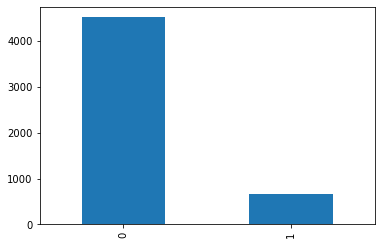

In [10]:
# 정상메일과 스팸메일 분포현황
data['v1'].value_counts().plot(kind='bar')

In [11]:
# 정상메일과 스팸 메일 개수
data['v1'].size

5169

In [12]:
#각각의 정상 메일과 스팸 메일 갯수
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [13]:
data.groupby('v1').size()

v1
0    4516
1     653
dtype: int64

In [14]:
# 비율 환산하기 소수점 둘째 자리까지
round(data['v1'].value_counts()[0] / len(data) *100,2)

87.37

In [15]:
# 정상메일과 스팸메일 비율(%)로 환산하기

print('정상메일 비율:', round(data['v1'].value_counts()[0] / len(data) *100,2))
print(f'스펨메일 비율: {round(data["v1"].value_counts()[1] / len(data) *100,2)}%')

정상메일 비율: 87.37
정상메일 비율: 12.63%


In [16]:
# X_data , y_data 저장해주기
X_data = data['v2']
y_data = data['v1']
print('메일 본문 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문 개수: 5169
레이블의 개수: 5169


In [17]:
# 훈련데이터와 테스트데이터 비율 나누기 
# sklearn의 train_test_split에 stratify의 인자로서 레이블 데이터를 기재하면 훈련데이터와 테스트 데이터를 분리할 때 레이블의 분포가 고르게 분포됨
# random_state : 임의의 수 고정

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size= 0.2, random_state=0, stratify=y_data) 

In [18]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 87.376%
스팸 메일 = 12.624%


In [19]:
print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
정상 메일 = 87.331%
스팸 메일 = 12.669%


In [20]:
# 훈련데이터 토큰화 하기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]


In [21]:
# 1번부터 빈도 수가 가장 높은 단어
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'on': 17, 'call': 18, 'that': 19, 'are': 20, '2': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'or': 27, "i'm": 28, 'get': 29, 'at': 30, 'do': 31, 'if': 32, 'be': 33, 'will': 34, 'just': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, '4': 42, 'how': 43, 'gt': 44, 'lt': 45, 'go': 46, 'when': 47, 'from': 48, 'what': 49, 'ok': 50, 'out': 51, 'know': 52, 'free': 53, 'all': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'am': 59, 'time': 60, 'was': 61, 'come': 62, 'its': 63, 'love': 64, 'want': 65, 'text': 66, 'he': 67, 'only': 68, 'there': 69, 'day': 70, 'need': 71, 'going': 72, 'lor': 73, 'send': 74, 'one': 75, 'as': 76, 'home': 77, 'about': 78, 'back': 79, 'still': 80, 'k': 81, 'see': 82, 'txt': 83, 'by': 84, 'da': 85, 'stop': 86, 'r': 87, 'any': 88, 'tell': 89, 'dont': 90, "i'll": 91, "don't": 9

In [22]:
# 각 단어의 빈도수 확인하기
tokenizer.word_counts.items()

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [33]:
threshold = 2 # 한계치가 2회 미만 즉, 1회 밖에 안되는 단어들을 보기위한 한계치 설정
total_cnt = len(word_to_index) #단어의 수
rare_cnt = 0 # 등장 빈도 수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도 수 총 합
rare_freq = 0 # 등장 빈도 수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(Pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
      # 단어의 등장 빈도 수가 threshold보다 작으면
    if value < threshold :
        rare_cnt = rare_cnt +1
        rare_freq = rare_freq + value

print('전체 단어 빈도수 총 합:',total_freq)

print('등장빈도가 %s번 이하인 희귀 다원의 수: %s' %(threshold -1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)  
        

전체 단어 빈도수 총 합: 65145
등장빈도가 1번 이하인 희귀 다원의 수: 4337
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.45326684567191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.65745644331875


등장빈도가 threshold 값인 2회 미만, 즉 1회밖에 되지 않는 단어들은 단어 집합에서 절반 이상을 차지한다.
등장빈도가 지나치게 낮은 단어들을 자연어 처리에서 제외하고 싶다면 Keras Tokenizer 선언 시에 단어 집합의 크기를 제한 할 수 있다.

tokenizer = Tokenizer(num_words = total_cnt - rare_cnt +1)

In [35]:
# 패딩을 위한 토큰인 0번 단어를 고려하여 +1을 해서 저장 (무슨 말이지?)

vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 7822


메일의 최대 길이: 189
메일의 평균 길이: 15.75453446191052


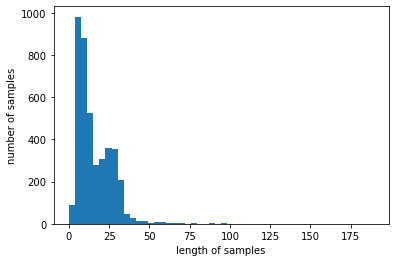

In [70]:
# 전체 데이터에서 길이가 가장 긴 메일과 전체 메일 데이터의 길이 분포 확인
print('메일의 최대 길이:', max(len(sample) for sample in X_train_encoded)    )

# 평균길이 = 단어 빈도 수 길이 총합 % 훈련데이터 길이
print('메일의 평균 길이:', sum(map(len, X_train_encoded))/len(X_train_encoded) ) #map(function, iterable) 

plt.hist([len(sample) for sample in X_train_encoded], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 패딩(padding)
자연어 처리를 하다보면 각 문장은 서로 길이가 다를 수 있다. 그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있다. 즉, 병렬 연산을 위해 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요하다.

케라스 전처리 도구로 패딩이 가능 \
from tensorflow.keras.preprocessing.sequence import pad_sequences \
padded = pad_sequences(encoded)

#### https://wikidocs.net/83544

In [84]:
max_len = 189

X_train_padded = pad_sequences(X_train_encoded , maxlen= max_len)
print("훈련데이터의 크기(shape):", X_train_padded.shape)

훈련데이터의 크기(shape): (4135, 189)


## RNN으로 스팸 메일 분류하기
1) 하이퍼 파라미터 설정 
- 임베딩 벡터 차원: 32 
- 은닉상태 크기: 32
- 모델 구조: 다 대 일 구조
- 배치 크기: 64
- 검증데이터 = 20%

2) 회귀방법과 활성화 함수, 손실함수 선택
- 이진분류 
- 회귀방법: 로지스틱 회귀
- 활성화 함수: 시그모이드 함수
- 손실함수: 크로스 엔트로피 함수

In [86]:
pip install tensorflow

### 케라스 심층 심경망의 학습방법
#### 케라스는 심층 신경망의 학습하는 방법을 정하는 명렁어 제공, compile함수 

1) 오차 값을 계산하는 방법을 알려줘야 함. 해당 인공지능은 이진분류이므로 'binary_crossentropy' 사용 \
2) 오차를 줄이는 방법을 알려줘야 함. Optimizer 사용 \
    - 옵티마이저란? 딥러닝을 통해 인공지능 모델을 학습시킬 때 발생하는 오차를 줄이기 위해 경사하강법 알고리즘을 사용 \
    - 경사하강법을 어떤 방식으로 사용할 지 케라스에서 모아놓은 것이 바로 옵티마이저 라이브러리\
    - 옵티마이저 종류에는 아담(adam) 외에 확률적 경사하강법(SGD) , 평균제곱역전파(RMSP: Root mean square propagation)\
3) 학습 결과를 어떻게 확인할지 알려줘야 함. \
    - 정확도로 모델 학습결과 확인 metrics=['accuaracy']
    
#### model.fix(X_train,Y_train, batch_size, epochs, verbose, validation_split)
케라스의 학습 시키기 위해 '맞춘다'는 의미를 가진 fit 함수 제공 

1) 입력데이터를 정해야함: X_train, Y_train\
2) batch_size: 인공지능 모델이 한 번에 학습하는 데이터의 수. \
    즉, 데이터 셋을 여러 작은 그룹으로 나누었을 경우 하나의 소그룹에 속하는 데이터의 수. 전체 훈련데이터를 통째로 신경망에 
    넣으면 비효율적이기 때문\
3) Epochs: 모든 데이터를 1번 학습하는 것을 의미\
4) verbose: fit 함수의 결과값을 출력하는 방법 0: 아무런 표시X, 1: 에포크별 진행사항 알려줌, 2: 에포크별 학습결과 알려줌\
5) validation_split: 검증테스트를 몇으로 나눌 것인가에 대해 표시


In [119]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential() # 인공지능 모델을 시퀀셜(Sequential) 방식으로 정의
model.add(Embedding(vocab_size, embedding_dim)) # 모델에 층을 추가 / 명령어 add 
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation = 'sigmoid')) #어떤 형태인지 설정 Dense('은닉층의 노드수','입력하는 데이터의 형태')



model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics= ['acc'])
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=15, validation_split= 0.2, verbose=1)

Epoch 1/5
221/221 [==============================] - 27s 100ms/step - loss: 0.2376 - acc: 0.9157 - val_loss: 0.2469 - val_acc: 0.9250
Epoch 2/5
221/221 [==============================] - 21s 97ms/step - loss: 0.0966 - acc: 0.9664 - val_loss: 0.2308 - val_acc: 0.9069
Epoch 3/5
221/221 [==============================] - 21s 97ms/step - loss: 0.0428 - acc: 0.9864 - val_loss: 0.0685 - val_acc: 0.9807
Epoch 4/5
221/221 [==============================] - 22s 98ms/step - loss: 0.0284 - acc: 0.9912 - val_loss: 0.0704 - val_acc: 0.9794
Epoch 5/5
221/221 [==============================] - 22s 98ms/step - loss: 0.0181 - acc: 0.9949 - val_loss: 0.0750 - val_acc: 0.9794


In [120]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print('테스트 정확도:', model.evaluate(X_test_padded, y_test)[1])

33/33 [==============================] - 1s 21ms/step - loss: 0.0838 - acc: 0.9749
테스트 정확도: 0.9748549461364746


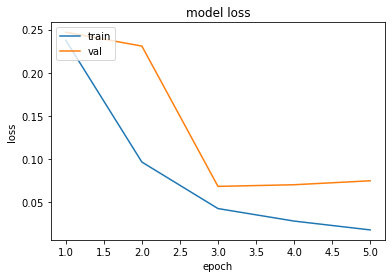

In [121]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()